# Assignment No-4

## Salary_hike -> Build a prediction model for Salary_hike

In [21]:
#importing and installing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from numpy.polynomial.polynomial import polyfit
from sklearn.linear_model import LinearRegression

In [22]:
salary = pd.read_csv("Salary_Data.csv")

In [23]:
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [24]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [25]:
salary.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

#### hence there is no null in the given set of data

In [26]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


#### The aove output suggest that the avaerage years of experience of the employees in the given set of data is approximately 5.3 years with a deviation of 2.8 years. The total count of the employee is 30 and the maximum year of experience is 10.5 years. In terms of Salary, the minimum salary is 37731 and maximum salary is 122391. If we look at the average salary, then it comes to 76003. 

# Scatter Plot to undersatnd about the data

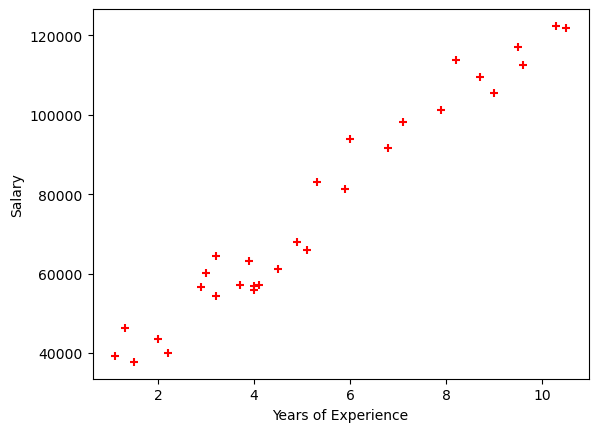

In [27]:
#matplotlib inline
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.scatter(salary['YearsExperience'],salary['Salary'],color='red',marker='+')

#### the above plot reflects that there is a positive relation between Years of Experience and Salary. As the years of experience increases the salary also incraeses. The plot also suggests that major number of employees are in the range of 3 to 6 years of experience

## Correlation

In [28]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


#### the above results clearly suggests that there is a strong positive correlation between years of experience & salary

## Regression Model

### Model No-1- Without Transformation

In [29]:
x = salary['YearsExperience'] #independent Variable 
y = salary['Salary'] # dependent variable

In [30]:
model1 = sm.OLS(y,x).fit()

In [31]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              1048.
Date:                Wed, 08 Nov 2023   Prob (F-statistic):                    2.56e-24
Time:                        18:03:40   Log-Likelihood:                         -327.28
No. Observations:                  30   AIC:                                      656.6
Df Residuals:                      29   BIC:                                      658.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience  1.325e+04    409.401     32.376      0.000    1.24e+04    1.41e+04
==============================================================================
Omnibus:                        0.610   Durbin-Watson:                   0.323
Prob(Omnibus):                  0.737   Jarque-Bera (JB):                0.671
Skew:                          -0.121   Prob(JB):                        0.715
Kurtosis:                       2.308   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The above results of model no-1 suggests that the model has R square with 97.3% which indicates that it explains approximately 97% of the variance in dependent variable. We will also explore the other models to select the better model for predicting the salary. 

## Model No-2:  Log Transformation 

In [32]:
#transforming the dependent & independent variables into log form
x_log = np.log(salary['YearsExperience'])
y_log = np.log(salary['Salary'])

In [33]:
model2 = sm.OLS(y_log, x_log).fit()
predictions = model2.predict(x_log)

In [34]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.878
Model:                            OLS   Adj. R-squared (uncentered):              0.874
Method:                 Least Squares   F-statistic:                              209.1
Date:                Wed, 08 Nov 2023   Prob (F-statistic):                    8.60e-15
Time:                        18:03:42   Log-Likelihood:                         -83.410
No. Observations:                  30   AIC:                                      168.8
Df Residuals:                      29   BIC:                                      170.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience     6.4461      0.446     14.461      0.000       5.534       7.358
==============================================================================
Omnibus:                        2.550   Durbin-Watson:                   0.026
Prob(Omnibus):                  0.279   Jarque-Bera (JB):                2.163
Skew:                           0.640   Prob(JB):                        0.339
Kurtosis:                       2.697   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The R square of model no-2 is lesser than model no-1. The R square is 87.8% which indicates that the model explains approximately 87% of the variance in dependent variable. 

## Model No-3: Square Root Transformation

In [35]:
#Transforming the dependent & independent variables into square root

x_sqrt = np.sqrt(salary['YearsExperience'])
y_sqrt = np.sqrt(salary['Salary'])

In [36]:
model3 = sm.OLS(y_sqrt, x_sqrt).fit()
predictions = model3.predict(x_sqrt)

In [37]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              2338.
Date:                Wed, 08 Nov 2023   Prob (F-statistic):                    2.81e-29
Time:                        18:03:44   Log-Likelihood:                         -145.12
No. Observations:                  30   AIC:                                      292.2
Df Residuals:                      29   BIC:                                      293.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience   118.8652      2.458     48.352      0.000     113.837     123.893
==============================================================================
Omnibus:                        2.762   Durbin-Watson:                   0.231
Prob(Omnibus):                  0.251   Jarque-Bera (JB):                2.152
Skew:                           0.653   Prob(JB):                        0.341
Kurtosis:                       2.881   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The R square of Model No-3 is better than the first two models. The R square of the Square Root Transformation model is 98.8% which indicates that the model explains approximately 98% of the variance in dependent variable


Output Interpretation

We will select Model 3 as it has the best R squared value with 98.8%. That is the model with Square root transformation of the dependent & independent variables

1 - p-value < 0.01 Thus the model is accepted

2 - coefficient == 118.8652 Which indicates that if the experience is increased by 1 year, the predicted value of Salary will increase by 118.8652

3 - R-sqared == 0.988. That is the selected model explains 98.8% of the variance in dependent variable